# Import Resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

# Read In And Display The Image

In [2]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimentions
print('Image dimentions:' , image.shape)

Image dimentions: (450, 660, 3)


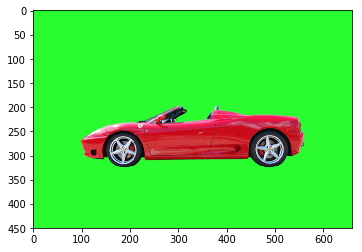

In [5]:
# Display the image
plt.imshow(image)

# Define The Color Thershold

In [8]:
x =100
y = 100
print(image[y , x])

[ 41 253  47]


In [17]:
lower_green = np.array([30 , 250 , 30])
upper_green = np.array([240 , 255 , 240])

# Create A Mask

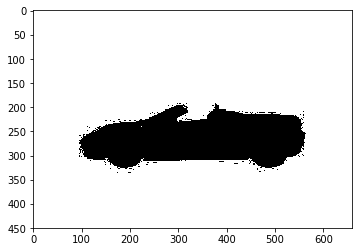

In [18]:
# Define the masked area
mask = cv2.inRange(image , lower_green , upper_green)

# Visualize the mask
plt.imshow(mask , cmap = 'gray')

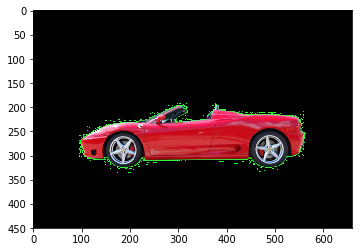

In [20]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0 , 0 , 0]

# Display it
plt.imshow(masked_image)

# Mask And Add A Background Image

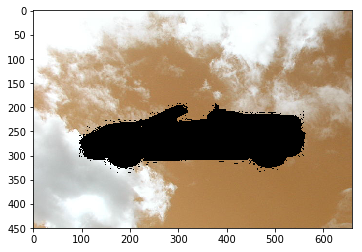

In [22]:
# Load in a background image and convert it to RGB
background_image = mpimg.imread('images/sky.jpg')
background_image = cv2.cvtColor(background_image , cv2.COLOR_BGR2RGB)

# Crop it to fit (450x660)
crop_background = background_image[0:450 , 0:660]

# Mask the cropped background so that the car is blocked
crop_background[mask == 0] = [0 , 0 , 0]

# Display it
plt.imshow(crop_background)

# Create A Complete Image

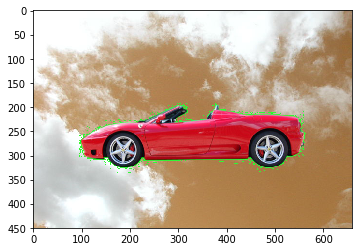

In [24]:
# Add the 2 images together
complete_image = masked_image + crop_background

# Display
plt.imshow(complete_image)